## Принятие решений в бизнесе на основе данных

### Описание проекта
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

---

### <a id="stepend"> Оглавление</a>

- [Импорт библиотек, данных и получение первичной информации](#step1)
- [Предобработка данных](#step2)
- [Исследовательский анализ данных](#step3)
- [EDA. Приоритизация гипотез](#step4)
- [EDA. Анализ A/B теста](#step5)
- [Общий вывод](#step6)

---

### План исследования
- Изменить тип данных там, где необходимо;
- Названия столбцов привести к нижнему регистру.

---

- Приоритизировать гипотезы методом ICE и отсортировать по убыванию приоритета;
- Приоритизировать гипотезы методом RICE и отсортировать по убыванию приоритета.

---

- Построить график кумулятивной выручки по группам, сделать выводы и предположения;
- Построить график кумулятивного среднего чека по группам, сделать выводы и предположения;
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A, сделать выводы и предположения;
- Построить график кумулятивной конверсии по группам, сделать выводы и предположения;
- Построить график относительного изменения кумулятивной конверсии группы B к группе А, сделать выводы и предположения
- Построить точечный график количества заказов по пользователям, сделать выводы и предположения;
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя, выбрать границу для определения аномальных пользователей;
- Построить точечный график стоимостей заказов, сделать выводы и предположения;
- Посчитать 95-й и 99-й перцентили стоимости заказов, выбрать границу для определения аномальных заказов;
- Посчитать статистическую значить различний в конверсии между группами по "сырым" данным, сделать выводы и предположения;
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным, сделать выводы и предположения;
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным, сделать выводы и предположения;
- Принять решение по результатам теста и объяснить его. Варианты - 1. Остановить тест и зафиксировать победу одной из группы; 2. Остановить тест, зафиксировать отсутствие различий между группами; 3 - Продолжить тест.

---

- Написать общий вывод.

### <a id='step1'>Импорт библиотек, данных и получение первичной информации</a>

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import scipy.stats as stats

In [2]:
# снимем ограничение на количество отображаемых символов в датасетах
pd.set_option('max_colwidth', 200)

In [3]:
# импортируем датасет hypothesis
hypothesis = pd.read_csv('')

In [4]:
# импортируем датасет orders
orders = pd.read_csv('')

In [5]:
# импортируем датасет visitors
visitors = pd.read_csv('')

In [6]:
# первичное представление hypothesis
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [7]:
# первичное представление orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
# первичное представление visitors
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
# первые 5 строк hypothesis
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [10]:
# первые 5 строк
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
# первые 5 строк
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
# уникальные значения hypothesis
for column in hypothesis.columns:
    print(hypothesis[column].value_counts())

Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                                1
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа    1
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок                1
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию            1
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар             1
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей              1
Запустить акцию, дающую скидку на товар в день рождения                                                         1
Запустить собственную службу доставки, что сократит срок доставки заказов               

In [13]:
# уникальные значения orders
for column in orders.columns:
    print(orders[column].value_counts())

3574407166    1
2470658885    1
1476831880    1
3709669952    1
2764584088    1
             ..
1168756094    1
1185885568    1
11068804      1
486237576     1
1192185169    1
Name: transactionId, Length: 1197, dtype: int64
4256040402    11
2458001652    11
2378935119     9
2038680547     8
3717692402     5
              ..
3254689071     1
4186744110     1
1455861274     1
3612778094     1
3149228032     1
Name: visitorId, Length: 1031, dtype: int64
2019-08-05    48
2019-08-12    47
2019-08-14    47
2019-08-06    46
2019-08-15    46
2019-08-01    45
2019-08-28    45
2019-08-27    44
2019-08-02    44
2019-08-08    43
2019-08-19    43
2019-08-07    42
2019-08-29    42
2019-08-09    41
2019-08-26    41
2019-08-22    41
2019-08-03    40
2019-08-23    40
2019-08-10    39
2019-08-16    38
2019-08-21    37
2019-08-30    35
2019-08-13    35
2019-08-04    33
2019-08-20    32
2019-08-31    32
2019-08-24    31
2019-08-11    26
2019-08-18    26
2019-08-17    24
2019-08-25    24
Name: date, dtype:

In [14]:
# уникальные значения visitors
for column in visitors.columns:
    print(visitors[column].value_counts())

2019-08-13    2
2019-08-06    2
2019-08-05    2
2019-08-19    2
2019-08-09    2
2019-08-21    2
2019-08-01    2
2019-08-03    2
2019-08-29    2
2019-08-25    2
2019-08-17    2
2019-08-20    2
2019-08-18    2
2019-08-10    2
2019-08-07    2
2019-08-27    2
2019-08-16    2
2019-08-24    2
2019-08-28    2
2019-08-12    2
2019-08-30    2
2019-08-08    2
2019-08-31    2
2019-08-22    2
2019-08-02    2
2019-08-14    2
2019-08-04    2
2019-08-23    2
2019-08-11    2
2019-08-26    2
2019-08-15    2
Name: date, dtype: int64
A    31
B    31
Name: group, dtype: int64
610    2
718    2
654    2
490    2
509    1
575    1
699    1
709    1
361    1
560    1
679    1
421    1
676    1
546    1
544    1
543    1
722    1
707    1
668    1
667    1
406    1
531    1
656    1
655    1
395    1
650    1
646    1
644    1
770    1
577    1
711    1
581    1
617    1
378    1
413    1
746    1
502    1
628    1
756    1
369    1
412    1
621    1
748    1
619    1
487    1
507    1
609    1
737    1
735  

In [15]:
# проверим на пропуски hypothesis
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [16]:
# проверим на пропуски orders
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [17]:
# проверим на пропуски visitors
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [18]:
# проверим на дубликаты hypothesis
hypothesis.duplicated().sum()

0

In [19]:
# проверим на дубликаты orders
orders.duplicated().sum()

0

In [20]:
# проверим на дубликаты visitors
visitors.duplicated().sum()

0

#### Вывод

#### Датасет Hypothesis

#### Наименования столбцов
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

#### Наименования столбцов необходимо привести к нижнему регистру.

---

#### Датасет Orders

#### Наименования столбцов и обнаруженные ошибки:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

#### Столбец date необходимо привести к формату даты.

---

#### Датасет Visitors
Количество элементов - 62, количество уникальных значений - 91, количество столбцов - 3, тип данных - int, object.

#### Наименования столбцов
date — дата;
group — группа A/B-теста;
visitors — количество пользователей в указанную дату в указанной группе A/B-теста;


#### Столбец date необходимо привести к форматы даты.

---

#### На этапе предобработки необходимо:
- Тип данных столбцов date в датасетах orders и visitors необходимо привести к формату даты;
- Наименования столбцов в датасете hypothesis привести к нижнему регистру.

### <a id='step2'>Предобработка данных</a>

In [21]:
# тип данных date в orders приведем к формату даты
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [22]:
# проверим
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [23]:
# тип данных date в visitors приведем к формату даты
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [24]:
# проверим
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [25]:
# названия столбцов hypothesis к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

In [26]:
# проверим
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


### <a id='step3'>Исследовательский анализ данных</a>

### <a id='step4'>EDA. Приоритизация гипотез</a>

In [27]:
# приоритизируем гипотезы методом ICE

# посчитаем ICE
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 1)

# сортируем по значению ICE
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


In [28]:
# приоритизируем гипотезы методом RICE

# посчитаем RICE
hypothesis['RICE'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 1)

# сортируем по значению RICE
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


#### Вывод

#### Фреймворк ICE
- Наиболее подходящая гипотеза  - 8 - Запустить акцию, дающую скидку на товар в день рождения;
- Наименее подходящяя гипотеза - 4 - Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.

---

#### Фреймворк RICE
- Наиболее подходящая гипотеза RICE - 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Наимнее подходящая гипотеза - 4.

---

Измения в приоритизации гипотез между ICE и RICE возникли из-за того, что фреймворк ICE не учитывается, сколько пользователей затронут изменения. Фреймворк RICE как раз учитывает количество пользователей, которых затронут изменения.

В обоих случаях самой неподходящей гипотезой является четвертая.

### <a id='step5'>EDA. Анализ A/B теста</a>

#### Кумулятивная выручка по группам

In [29]:
# датафрейм с уникальными парами значений date и group
datesGroups = orders[['date', 'group']].drop_duplicates()

In [30]:
# аггрегированные кумулятивные данные по выручке за каждый день по заказам
ordersAggregated = datesGroups.apply(lambda x:
orders[np.logical_and(orders['date'] <= x['date'],
orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date', 'group'])

In [31]:
# выведем
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [32]:
# аггрегированные кумулятивные данные за каждый день по пользователям
visitorsAggregated = datesGroups.apply(lambda x:
visitors[np.logical_and(visitors['date'] <= x['date'],
visitors['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [33]:
# выведем
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [34]:
# сджойним датасеты
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'],
right_on=['date', 'group'])

# переименуем столбцы
cumulativeData.columns = ['date', 'group', 'transactions', 'buyers', 'revenue', 'visitors']

In [35]:
# выведем
cumulativeData.head()

,date,group,transactions,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [36]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'transactions']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'transactions']]

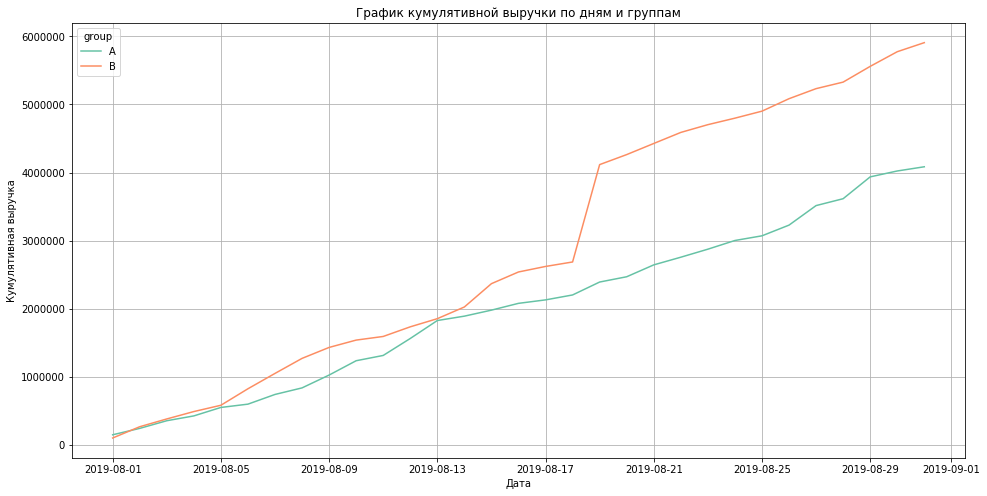

In [37]:
# нарисуем график кумулятивной выручки по дням и группам
plt.figure(figsize=(16, 8))
ax = sns.lineplot(data=cumulativeData, x='date', y='revenue', hue='group',\
                 palette=sns.color_palette('Set2', n_colors=2))
ax.set_title('График кумулятивной выручки по дням и группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.grid()
plt.show();

- Изначально кумулятивная выручка росла практически равномерно, но после 18.08.2019 кумулятивная выручка группы B резко увеличилась и продолжила расти.

In [38]:
# посчитаем средний чек
cumulativeData['mean'] = round(cumulativeData['revenue'] / cumulativeData['transactions'], 2)

In [39]:
# выведем
cumulativeData.head()

,date,group,transactions,buyers,revenue,visitors,mean
0,2019-08-01,A,24,20,148579,719,6190.79
1,2019-08-01,B,21,20,101217,713,4819.86
2,2019-08-02,A,44,38,242401,1338,5509.11
3,2019-08-02,B,45,43,266748,1294,5927.73
4,2019-08-03,A,68,62,354874,1845,5218.74


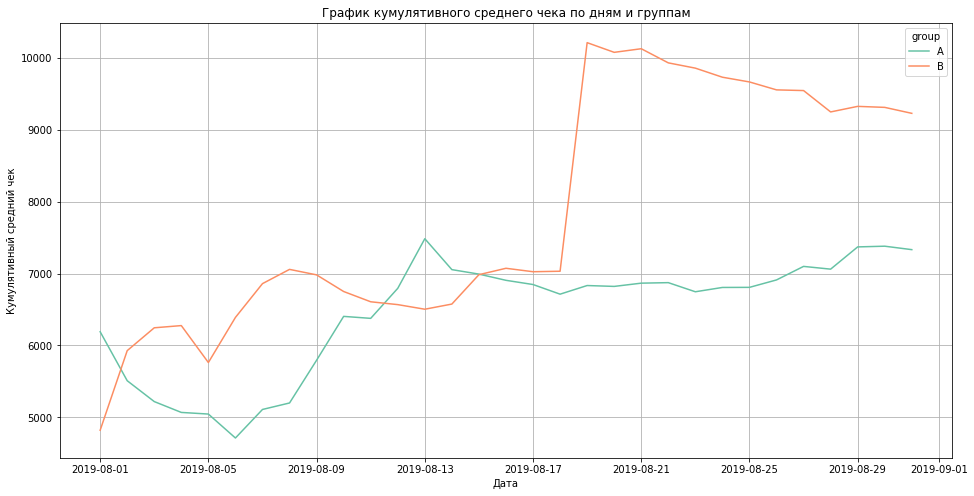

In [40]:
# нарисуем график кумулятивного среднего чека по дням и группам
plt.figure(figsize=(16, 8))
ax = sns.lineplot(data=cumulativeData, x='date', y='mean', hue='group',\
                 palette=sns.color_palette('Set2', n_colors=2))
ax.set_title('График кумулятивного среднего чека по дням и группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.grid()
plt.show();

- До определенного момента значениям кумулятивного среднего чека обеих групп стабилизироваться не удавалось, однако после 18.018.2019 средний чек у группы B резко вырастает, а спустя некоторое время снова начинается снижаться до уровня группы A.

In [41]:
# соберем данные о кумулятивной выручке двух групп в отдельный датасет
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,\
                                                   left_on ='date', right_on='date', how='left', suffixes=['A', 'B'])

In [42]:
# выведем
mergedCumulativeRevenue.head()

,date,revenueA,transactionsA,revenueB,transactionsB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


C:\Users\sokol\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


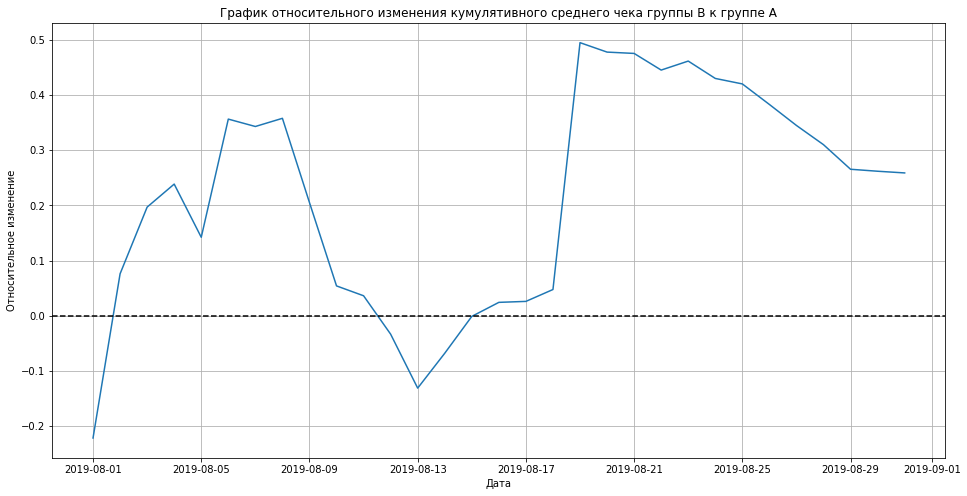

In [43]:
# нарисуем график относительного изменения кумулятивных средних чеков  
plt.figure(figsize=(16, 8))
ax1 = sns.lineplot(mergedCumulativeRevenue['date'],\
                   (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionsB'])
/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionsA'])-1,\
                  palette=sns.color_palette('Set2', n_colors=1))
ax1.set_title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.show();

- Только после 13.08.2019 группа B показала себя хуже группы A. В остальные дни группа B стабильно лучше группы A.

In [44]:
# добавим в датасет столбец с данными о конверсии
cumulativeData['conversion'] = round(cumulativeData['transactions'] / cumulativeData['visitors'], 4)

In [45]:
# выведем
cumulativeData.head()

,date,group,transactions,buyers,revenue,visitors,mean,conversion
0,2019-08-01,A,24,20,148579,719,6190.79,0.0334
1,2019-08-01,B,21,20,101217,713,4819.86,0.0295
2,2019-08-02,A,44,38,242401,1338,5509.11,0.0329
3,2019-08-02,B,45,43,266748,1294,5927.73,0.0348
4,2019-08-03,A,68,62,354874,1845,5218.74,0.0369


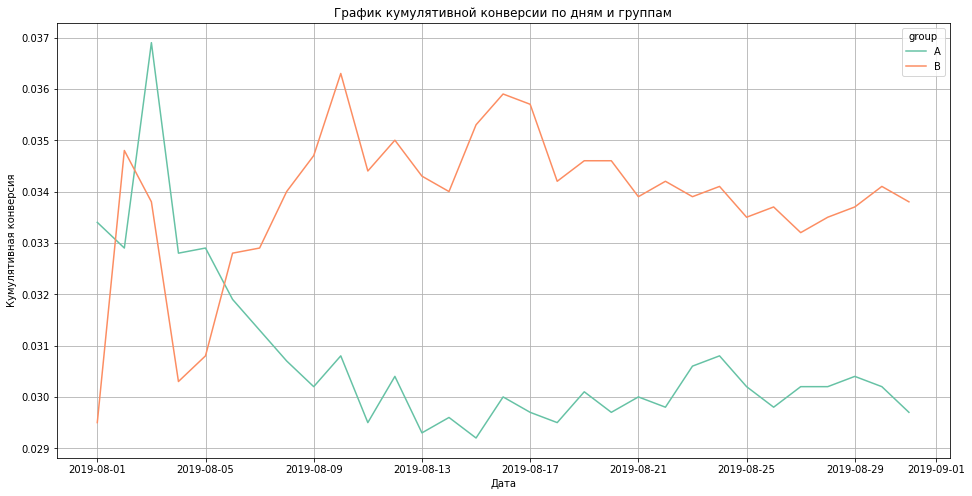

In [46]:
# нарисуем график кумулятивной конверсии по дням и группам
plt.figure(figsize=(16, 8))
ax = sns.lineplot(data=cumulativeData, x='date', y='conversion', hue='group',\
                 palette=sns.color_palette('Set2', n_colors=2))
ax.set_title('График кумулятивной конверсии по дням и группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.grid()
plt.show();

- У группы A наибольшее значение кумулятивной конверсии в пике, скорее всего, было зафиксировано аномально-высокое количество посетителей, однако в действительности, значения у нее хуже, чем у группы B
- Кумулятивные конверсии у двух групп распределены неравномерно, однако к концу графика можно сделать предположение об их сближении.

In [47]:
# разобьем данные о конверсиях по группам

# группа А
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

# группа B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

In [48]:
# соберем данные о кумулятивной конверсии двух групп в отдельный датасет
mergedCumulativeConversion = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']],\
       left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

In [49]:
# выведем
mergedCumulativeConversion.head()

,date,conversionA,conversionB
0,2019-08-01,0.0334,0.0295
1,2019-08-02,0.0329,0.0348
2,2019-08-03,0.0369,0.0338
3,2019-08-04,0.0328,0.0303
4,2019-08-05,0.0329,0.0308


C:\Users\sokol\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


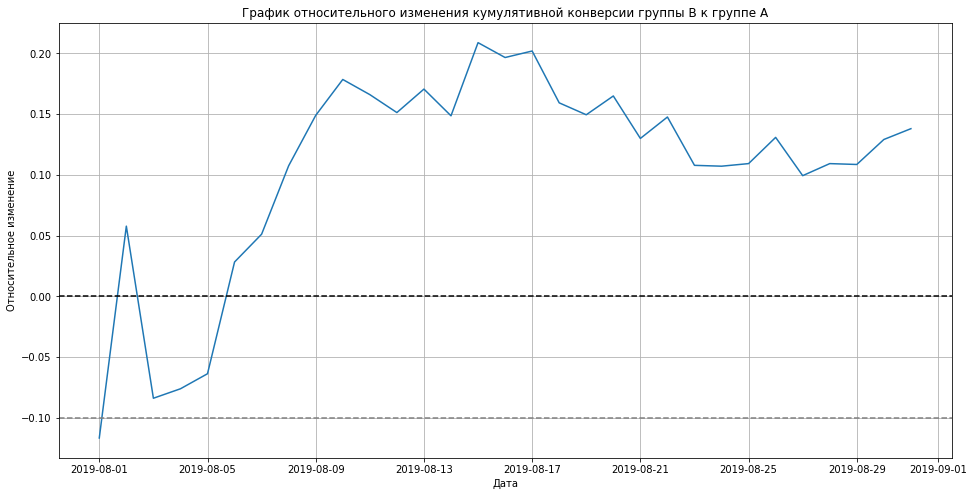

In [50]:
# нарисуем график относительного изменения кумулятивной конверсии для исследуемых групп
plt.figure(figsize=(16, 8))
ax2 = sns.lineplot(mergedCumulativeConversion['date'],\
                   mergedCumulativeConversion['conversionB']/mergedCumulativeConversion['conversionA']-1,\
                  palette=sns.color_palette('Set2', n_colors=1))
ax2.set_title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.grid()
plt.show();                                                                                   

- Кумулятивная конверсия группы B, за исключением нескольких дней, стабильно выше, чем у группы A.

In [51]:
# посчитаем количество заказов на каждого пользователя
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1)\
.groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

In [52]:
# выведем 5 строк
ordersByUsers.head()

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


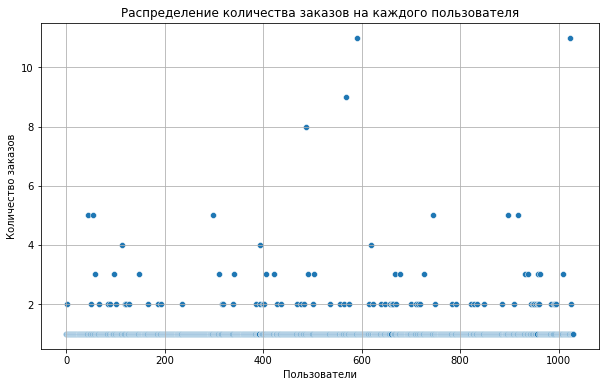

In [53]:
# нарисуем график распределения количества заказов на каждого пользователя

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x=x_values, y=ordersByUsers['transactionId'])
plt.title('Распределение количества заказов на каждого пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.grid()
plt.show();

- Основная масса заказов сосредоточена в пределах единицы; есть аномальные значения около двойки и тройки. 
- После четырех заказов начинаются совсем незначительные аномалии, от которых можно будет избавиться.

In [54]:
# 95-й и 99-й перцентили количества заказов на пользователя
percentile_for_transaction = np.percentile(ordersByUsers['transactionId'], [95,99])

In [55]:
percentile_for_transaction

array([2., 4.])

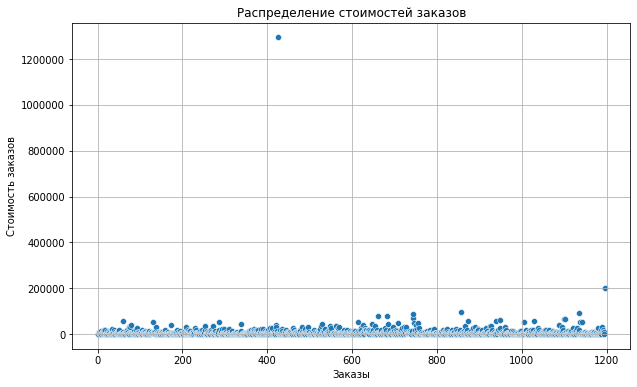

In [56]:
# нарисуем график стоимостей заказов

x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x= x_values, y = orders['revenue'])
plt.title('Распределение стоимостей заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов')
plt.grid()
plt.show();

- Основная масса стоимостей заказов сосредоточена в одной области. Аномальные значения практически отсутствуют.

In [57]:
# 95-й и 99-й перцентили стоимости заказов
percentile_for_transaction_price = np.percentile(orders['revenue'], [95,99])

In [58]:
percentile_for_transaction_price

array([28000. , 58233.2])

#### Примем за аномальных пользователей тех, которые совершили более двух заказов и на сумму более 28 тысяч рублей.

#### Проверим статистически значимые различия в конверсиях между группами по "сырым" данным

#### H0 - статистически значимых различий в конверсиях между группами нет.
#### H1 - в конверсиях между группами присутствуют статистически значимые различия.

In [59]:
# данные о заказах группы A
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'transactions']

# данные о заказах группы B
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'transactions']

# найдем количество посетителей группы A на конкретную дату
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# найдем количество посетителей группы B на конкретную дату
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# переменная sampleA
sampleA = pd.concat([ordersByUsersA['transactions'],\
                     pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA']\
                                                  .sum() - len(ordersByUsersA['transactions'])), name='transactions')],axis=0)

# переменная SampleB
sampleB = pd.concat([ordersByUsersB['transactions'],\
                     pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB']\
                                                  .sum() - len(ordersByUsersB['transactions'])), name ='transactions')], axis=0)

# рассчитаем статистическую значимость
print('Статистическая значимость: {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# относительное различие
print("Относительное различие: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

Статистическая значимость: 0.008
Относительное различие: 0.138


- p-value(0.008) < 0.05 - в конверсиях между группами есть статистически значимое различие;
- относительное преимущество группы B перед группой A - 13.8%.

Гипотеза H1 о статистически значимых различиях в конверсиях между группами A и B подтверждена.

#### Проверим статистически значимые различия в среднем чеке между группами по "сырым" данным.

#### H0 - статистически значимых различий в среднем чеке между группами нет.
#### H1 - в среднем чеке между группами есть статистически значимые различия.

In [60]:
# статистическая значимость
print("Статистическая значимость: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'],\
                                          orders[orders['group'] == 'B']['revenue'])[1]))

# относительное различие среднего чека между группами
print("Относительное различие: {0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean()/
orders[orders['group'] == 'A']['revenue'].mean()-1))

Статистическая значимость: 0.365
Относительное различие: 0.259


- p-value(0.365) > 0.05 - статистически значимое различие в среднем чеке между группами присутствует;
- относительное преимущество группы B перед группой A - 25.9%.

Гипотеза H0 о равенстве среднего чека в группах A и B подтверждена.

13.8% в конверсии являются статистически значимым результатом, а 25.9% в среднем чеке не являются статистически значимым результатом. Это обусловлено непараметрическим тестом Манна-Уитни. При расчетах он не учитывают аномальные значения. 

In [61]:
# отсеем пользователей, совершивших более двух заказов и пользователей, совершивших покупки на сумму больше 28 тысяч рублей

# заказы
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['transactions'] > 4]['userId'],\
                                 ordersByUsersB[ordersByUsersB['transactions'] > 4]['userId']], axis = 0)

# стоимость
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

# объединим их в один датасет
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

In [62]:
# выведем
abnormalUsers.head()

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
dtype: int64

In [63]:
# узнаем, сколько всего аномальных пользователей
print(abnormalUsers.shape)

(59,)


#### Проверим статистически значимые различия в конверсии между группами по «очищенным» данным.

#### H0 - статистически значимых различий в конверсии между группами по "очищенным данным" нет.
#### H1 - в конверсии между группами "по очищенным данным" присутствуют статистически значимые различия.

In [64]:
# sampleAFiltered
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId']\
                                                           .isin(abnormalUsers))]['transactions'],\
                             pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA']\
                                                          .sum() - len(ordersByUsersA['transactions'])),\
                                       name='transactions')],axis=0)

# sampleBFiltered
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId']\
                                                           .isin(abnormalUsers))]['transactions'],\
                             pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB']\
                                                          .sum() - len(ordersByUsersB['transactions'])),\
                                       name='transactions')],axis=0)

# рассчитаем статистичекую значимость
print("Статистическиая значимость: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

# относительное различие
print("Относительное различие: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Статистическиая значимость: 0.009
Относительное различие: 0.145


- p-value(0.011) < 0.05 - есть статистически значимые различия в коневрсиях между группами A и B;
- относительное преимущество группы B перед группой A равно 14,9%.

Гипотеза H1 о присутствии статистически значимых различиях в конверсиях между группами A и B подтверждена.

#### Проверим статистически значимые различия в среднем чеке заказа между группами по «очищенным» данным.

#### H0 - статистически значимых различий в среднем чеке между группами "по очищенным данным" нет.
#### H1 - в среднем чеке между группами по "очищенным данным" присутвтуют статистически значимые различия.

In [65]:
# рассчитаем статистическую значимость
print("Статистическая значимость: {0:.3f}".format(stats.mannwhitneyu(
orders[np.logical_and(
orders['group'] == 'A',
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
orders[np.logical_and(
orders['group']=='B',
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

# рассчитаем относительное различие среднего чека
print("Относительное различие: {0:.3f}".format(
orders[np.logical_and(orders['group']=='B',
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
orders[np.logical_and(
orders['group']=='A',
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

Статистическая значимость: 0.481
Относительное различие: -0.014


- p-value(0,433) > 0.05 - отсутствуют статистчиески значимые различия в среднем чеке между группами A и B;
- относительный проигрыш группы B перед группой A равен 0.014%.

Гипотеза H0 о равенстве средних чеков между группами A и B подтверждена.

#### Вывод
- Статистически значимые различия в конверсии между группами есть в "сырых" и в "очищенных" данных;
- Статистически значимые различия в среднем чеке между группами отсутствует в "сырых" и в "очищенных данных";
- Конверсия группам B лучше конверсии группы A;
- После удаления аномальных значений средний чек группы B снизился и стал меньше, чем у группы A. Скорее всего, ее изначальное первенство было обусловлено аномалиями в данных.

---

#### Необходимо остановить тестирование и признать победу группы B.

### <a id='step6'>Общий вывод</a>

#### Наиболее подходящая гипотеза по фреймворку ICE - Запустить акцию, дающую скидку на товар в день рождения. 

#### Наиболее подходящая гипотеза по фреймворку RICE - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

#### Наимнее подходящая гипотеза по обоим фреймворкам - Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.

---

#### Выводы по "сырым данным".
- Согласено графикам кумулятивной выручки и графику кумулятивного среднего чека - группа B лучше группы A;
- Согласено графику относительного изменения кумулятиного среднего чека - Группа B лучше группы A;
- Согласно графику кумулятивной конверсии и графику относительного изменения кумулятивной конверсии - группа B лучше группы A;
- В основном пользователи совершают один или два заказа;
- В основном пользователи совершают покупки на сумму, не превышающую 28 тысяч рублей;
- Статистически значимое различие в конверсиях между группами присутствует - p-value(0.008) < 0.05, а относительное преимущество группы B перед группой A равно 13,8%;
- Статистически значимое различие в среднем чеке между группами отсутствует - p-value(0.365) > 0.05, однако средний чек группы B больше среднего чека группы A на 25,9%.

---

#### Выводы по "очищенным данным".
- Статистически значимое различие в конверсиях между группами присутствует - p-value(0.011) < 0.05, а относительное преимущество группы B перед группой A равно 14,9%;
- Статистически значимое различие в среднем чеке между группами отсутствует - p-value(0.433) > 0.05 - и средний чек группы B оказался незначительно меньше среднего чека группы A.

---

#### По итогу проведенного анализа принято решение остановить A/B тестирование и зафиксировать победу группы B.